# Visualizing ZDF files

This notebook can be used to quickly visualize ZDF files.

## Main routines

### Grid data

* `plot2d` - Open a `.zdf` grid file and produce a 2D (colormap) plot

### Particle data

* `part2D`- Open a `.zdf` particle file and produce a 2D (scatter) plot with the selected quantities
* `histogram` - Open a `.zdf` particle file and produce a histogram plot of the selected quantity

In [2]:
import zdf

import matplotlib.pyplot as plt
import matplotlib.colors as colors

def plot2d( filename, xlim = None, ylim = None, grid = False, cmap = None ):
    """Generates a colormap plot from a 2D grid zdf file

    Args:
        filename (str):
            Name of ZDF file to open
        xlim (tuple, optional):
            Lower and upper limits of x axis. Defaults to the x limits of the grid data.
        ylim (tuple, optional):
            Lower and upper limits of y axis. Defaults to the y limits of the grid data.
        grid (bool, optional):
            Display a grid on top of colormap. Defaults to False.
        cmap (str, optional):
            Name of the colormap to use. Defaults to the matplotlib imshow() colormap.
    """

    (data, info) = zdf.read(filename)

    if ( info.type != "grid" ):
        print("(*error*) file {} is not a grid file".format(filename))
        return
    
    if ( info.grid.ndims != 2 ):
        print("(*error*) file {} is not a 2D grid file".format(filename))
        return

    range = [
        [info.grid.axis[0].min, info.grid.axis[0].max],
        [info.grid.axis[1].min, info.grid.axis[1].max]
    ]

    plt.imshow( data, interpolation = 'nearest', origin = 'lower',
            extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
            aspect = 'auto', cmap=cmap )

    zlabel = "{}\,[{:s}]".format( info.grid.label, info.grid.units )

    plt.colorbar().set_label(r'$\sf{' + zlabel + r'}$')

    xlabel = "{}\,[{:s}]".format( info.grid.axis[0].label, info.grid.axis[0].units )
    ylabel = "{}\,[{:s}]".format( info.grid.axis[1].label, info.grid.axis[1].units )

    plt.xlabel(r'$\sf{' + xlabel + r'}$')
    plt.ylabel(r'$\sf{' + ylabel + r'}$')

    plt.title("$\sf {} $\nt = ${:g}$ [$\sf {}$]".format(
        info.grid.label.replace(" ","\;"),
        info.iteration.t,
        info.iteration.tunits))

    if ( xlim ):
        plt.xlim(xlim)
    if ( ylim ):
        plt.ylim(ylim)

    plt.grid(grid)


    plt.show()

def part2D( filename, qx, qy, xlim = None, ylim = None, grid = True, 
    marker = '.', ms = 1, alpha = 1 ):
    """Generates an (x,y) scatter plot from a ZDF particle file.

    Args:
        filename (str):
            Name of ZDF file to open
        qx (str):
            X axis quantity, usually one of "x", "y", "ux", "uy", "uz", etc.
        qy (str): _description_
            Y axis quantity, usually one of "x", "y", "ux", "uy", "uz", etc.
        xlim (tuple, optional):
            Lower and upper limits of x axis. Defaults to the limits of the "qx" particle data.
        ylim (tuple, optional):
            Lower and upper limits of y axis. Defaults to the limits of the "qy" particle data.
        grid (bool, optional):
            Display a grid on top of scatter plot. Defaults to True.
        marker (str, optional)
            Plot marker to use for the scatter plot. Defaults to '.'.
        ms (int, optional):
            Marker size to use for the scatter plot. Defaults to 1.
        alpha (int, optional):
            Marker opacity to use for the scatter plot. Defaults to 1.
    """
    (particles, info) = zdf.read(filename)

    if ( info.type != "particles" ):
        print("(*error*) file {} is not a particles file".format(filename))
        return
    
    if ( not qx in info.particles.quants ):
        print("(*error*) '{}' quantity (q1) is not present in file".format(qx) )
        return

    if ( not qy in info.particles.quants ):
        print("(*error*) '{}' quantity (q2) is not present in file".format(qy) )
        return

    x = particles[qx]
    y = particles[qy]

    plt.plot(x, y, marker, ms=ms, alpha = alpha)

    title = "{}/{}".format( info.particles.qlabels[qy], info.particles.qlabels[qx])
    timeLabel = "t = {:g}\,[{:s}]".format(info.iteration.t, info.iteration.tunits)

    plt.title(r'$\sf{' + title + r'}$' + '\n' + r'$\sf{' + timeLabel + r'}$')

    xlabel = "{}\,[{:s}]".format( info.particles.qlabels[qx], info.particles.qunits[qx] )
    ylabel = "{}\,[{:s}]".format( info.particles.qlabels[qy], info.particles.qunits[qy] )

    plt.xlabel(r'$\sf{' + xlabel + r'}$')
    plt.ylabel(r'$\sf{' + ylabel + r'}$')

    if ( xlim ):
        plt.xlim(xlim)
    if ( ylim ):
        plt.ylim(ylim)

    plt.grid(grid)

    plt.show()

def histogram( filename, q, bins = 128, range = None, density = True, log = False, color = None, histtype = 'bar' ):
    """Generates a histogram (frequency) plot from a ZDF particle file.

    Args:
        filename (str):
            Name of ZDF file to open
        q (str):
            Quantity to use, usually one of "x", "y", "ux", "uy", "uz", etc.
        bins (int, optional):
            Number of bins to use for the histogram. Defaults to 128.
        range (tuple, optional):
            Lower and upper limits of the histogram. Defaults to minimum and maximum values of the selected quantity.
        density (bool, optional):
            Plot a probability density (bin count divided by the total number of counts and the bin width) instead of 
            bin count. Defaults to True.
        log (bool, optional):
            Use log scale for histogram axis. Defaults to False.
        color (str, optional):
            Color for plot. Defaults to the matplotlib plot color.
        histtype (str, optional):
            Type of histogram to draw, check matplotlib histogram documentation for details. Defaults to 'bar'.
    """
    (particles, info) = zdf.read(filename)

    if ( info.type != "particles" ):
        print("(*error*) file {} is not a particles file".format(filename))
        return
    
    if ( not q in info.particles.quants ):
        print("(*error*) '{}' quantity (q1) is not present in file".format(q) )
        return
    
    data = particles[q]

    plt.hist( data, bins = bins, range = range, density = density, log = log, color = color, histtype = histtype )
    title = "{} - {}".format( info.particles.label, info.particles.qlabels[q])
    timeLabel = "t = {:g}\,[{:s}]".format(info.iteration.t, info.iteration.tunits)

    plt.title(r'$\sf{' + title + r'}$' + '\n' + r'$\sf{' + timeLabel + r'}$')

    xlabel = "{}\,[{:s}]".format( info.particles.qlabels[q], info.particles.qunits[q] )

    plt.xlabel(r'$\sf{' + xlabel + r'}$')
    plt.ylabel(r'$\sf{' + "n" + r'}$')

    plt.show()

## Example

Visualize file `test-000000.zdf`:

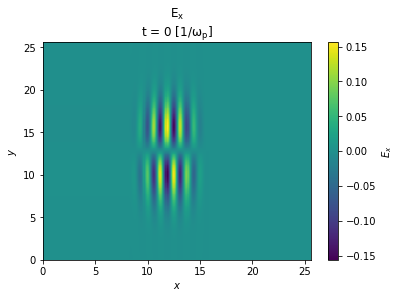

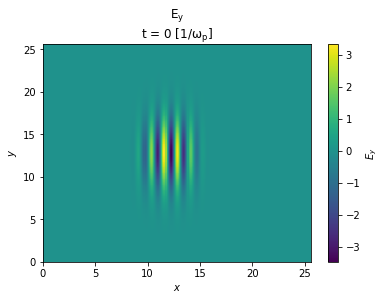

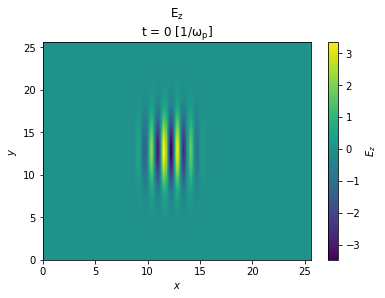

In [79]:

plot2d( "EMF/Ex-000000.zdf" )
plot2d( "EMF/Ey-000000.zdf" )
plot2d( "EMF/Ez-000000.zdf" )

Plotting B field components for iteration 57.


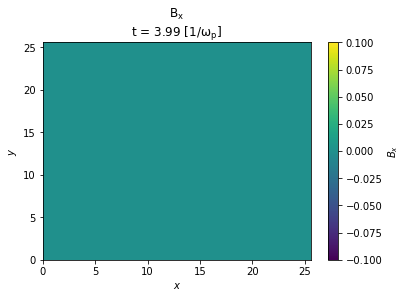

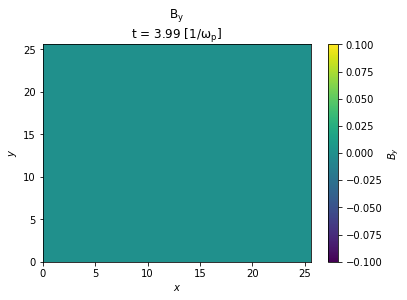

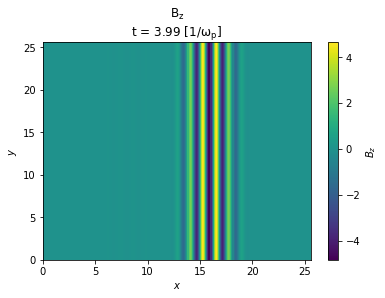

In [88]:
def plot_vfld( fld, iter ):
    print("Plotting {} field components for iteration {}.".format(fld,iter))
    
    file = "./EMF/{}x-{:06d}.zdf".format(fld,iter)
    plot2d(file)
    file = "./EMF/{}y-{:06d}.zdf".format(fld,iter)
    plot2d(file)
    file = "./EMF/{}z-{:06d}.zdf".format(fld,iter)
    plot2d(file)


plot_vfld('B',57)

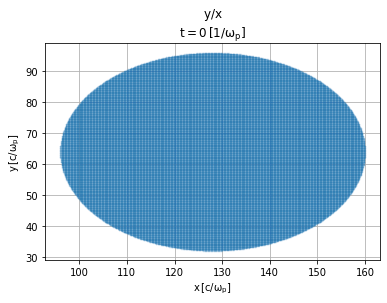

In [6]:
part2D( "PARTICLES/electrons/particles-electrons-000000.zdf", "x", "y", alpha = 0.2 )
# histogram( "PARTICLES/electrons/particles-electrons-000000.zdf", "uz", log = True )

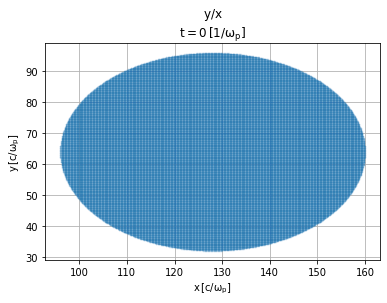

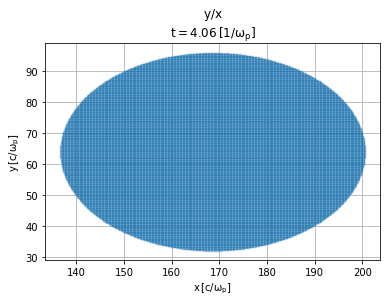

In [4]:

part2D( "PARTICLES/electrons/particles-electrons-000000.zdf", "x", "y", alpha = 0.2 )
part2D( "PARTICLES/electrons/particles-electrons-000058.zdf", "x", "y", alpha = 0.2 )

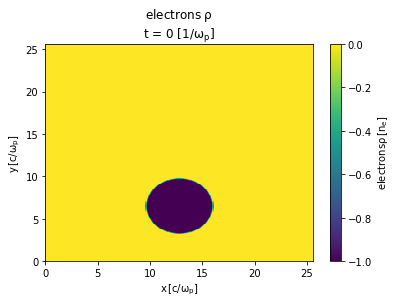

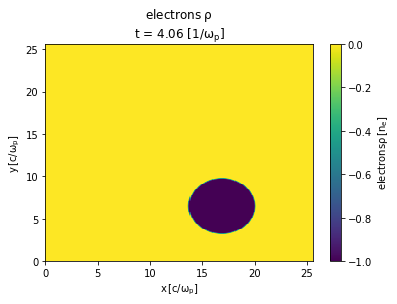

In [6]:
plot2d("CHARGE/electrons/electrons-charge-000000.zdf")
plot2d("CHARGE/electrons/electrons-charge-000058.zdf")

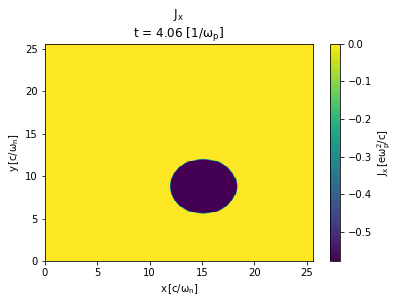

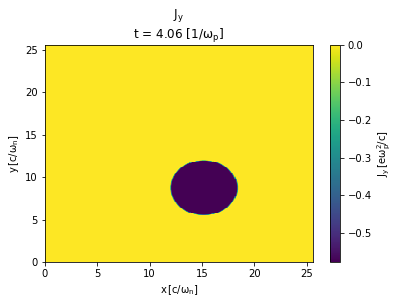

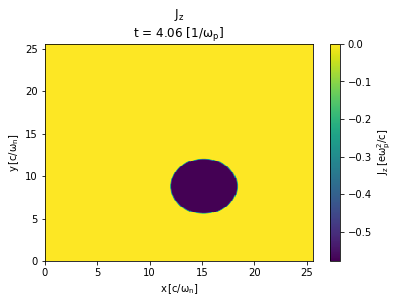

In [12]:
plot2d( "CURRENT/Jx-000058.zdf" )
plot2d( "CURRENT/Jy-000058.zdf" )
plot2d( "CURRENT/Jz-000058.zdf" )